In [242]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math

import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [243]:
df = pd.read_csv('Datasets/Student_Marks.csv')
df.shape

(100, 3)

In [244]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [246]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


# Feature Engineering

## Check Missing Values

In [247]:
total_missing = df.isnull().sum().sort_values(ascending=False)
total_missing

number_courses    0
time_study        0
Marks             0
dtype: int64

## Check Correlation

<AxesSubplot:>

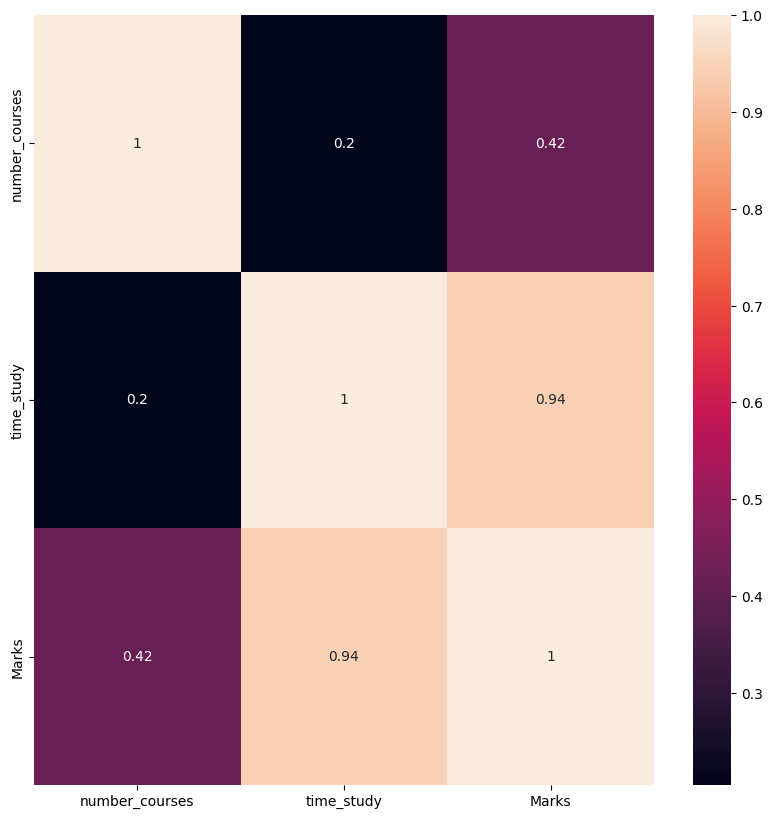

In [248]:
#check the correlation between the dependent and independent variables 
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [249]:
hous_num_corr = df.corr()['Marks'][:-1] #last row
#Display pearsons correlation coefficient greater than 0.5
top_features = hous_num_corr[abs(hous_num_corr) > 0.5].sort_values(ascending=False)
print('There is {} strongly correlated values with SalePrice:\n{}'.format(len(top_features),top_features))

There is 1 strongly correlated values with SalePrice:
time_study    0.942254
Name: Marks, dtype: float64


## Check Skewness

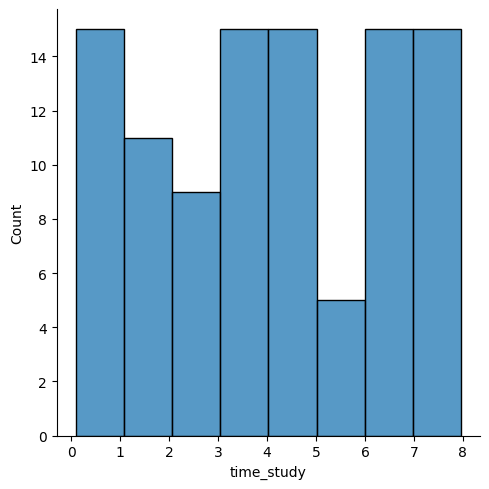

In [250]:
untransformed_1 = sns.displot(df['time_study'])

In [251]:
print('Skewness: %f' % df['time_study'].skew())

Skewness: -0.025053


## Check outliers

<AxesSubplot:xlabel='time_study'>

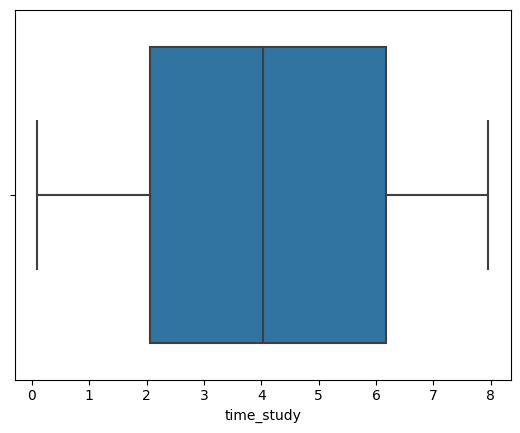

In [252]:
sns.boxplot(x=df['time_study'])

# Dataset Splitting

In [253]:
not_corr = df.iloc[:, 0:1]

Text(0, 0.5, 'Marks')

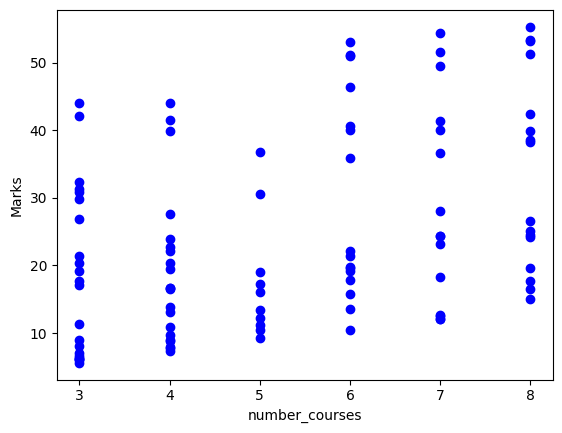

In [254]:
plt.scatter(not_corr, y, color = 'blue')
plt.xlabel('number_courses')
plt.ylabel('Marks')

In [255]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [256]:
X.shape

(100, 1)

In [257]:
y.shape

(100,)

In [258]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y,test_size = 0.3, random_state=1)

In [259]:
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Marks')

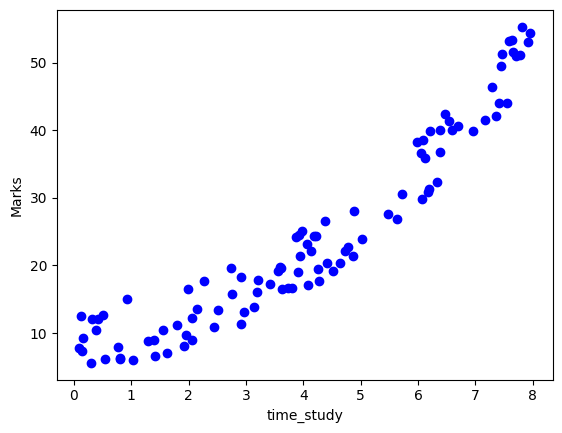

In [260]:
plt.scatter(X, y, color = 'blue')
plt.xlabel('time_study')
plt.ylabel('Marks')

# Train The Model

In [261]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

print('Linear Regression coefficients are: ', lin_model.coef_)
print('Linear Regression y-intercept is: ', lin_model.intercept_)

Linear Regression coefficients are:  [42.19000753]
Linear Regression y-intercept is:  2.5643809657697574


# Make Predictions

In [262]:
lin_y_pred = lin_model.predict(X_test)
lin_pred = pd.DataFrame({'Predicted': lin_y_pred, 'Actual': y_test})
lin_pred.head()

,Predicted,Actual
0,45.013587,54.321
1,12.748735,16.461
2,37.653421,39.965
3,14.260728,17.705
4,36.989224,42.426


# Fit The Model

Text(0, 0.5, 'Marks')

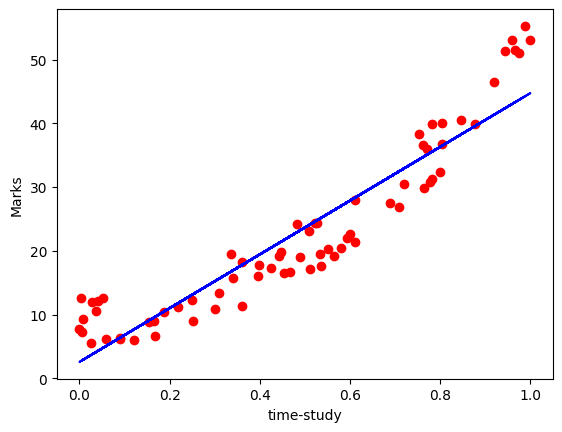

In [263]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, lin_model.predict(X_train), color='blue')
plt.xlabel('time-study')
plt.ylabel('Marks')

# Model Error

In [264]:
from sklearn.metrics import mean_squared_error

print('Linear Regression Model MSE is: ', mean_squared_error(y_test, lin_y_pred))
print('Linear Regression Model Training score: ', lin_model.score(X_train, y_train))
print('Linear Regression Model Test score: ', lin_model.score(X_test, y_test))

Linear Regression Model MSE is:  20.83047021959133
Linear Regression Model Training score:  0.8674778559786229
Linear Regression Model Test score:  0.9080296257704301
